<a href="https://colab.research.google.com/github/harshh-2/Telco_Customer_Churn_predictor/blob/main/tele_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Import Libraries**

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

**2.Uploading and cleaning the data**

In [40]:
data = pd.read_csv('/content/Telco-Customer-Churn.csv')
data = data.drop(['customerID'] , axis =1)
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.drop(labels=data[data['tenure'] == 0].index, axis=0, inplace=True)
data = pd.get_dummies(data, drop_first=True)
data = data.drop_duplicates()

**3.Data Visualisation for better understanding**


*3.1. Contract_Two year vs Churn rate*

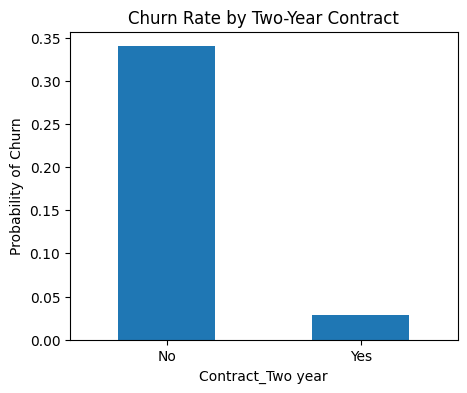

In [41]:
churn_rate = data.groupby('Contract_Two year')['Churn_Yes'].mean()
plt.figure(figsize=(5,4))
churn_rate.plot(kind='bar')
plt.title("Churn Rate by Two-Year Contract")
plt.ylabel("Probability of Churn")
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.show()


**Observation:** Customers with long-term contracts demonstrate significantly lower churn probability, indicating commitment duration is a major retention factor.

*3.2. Credit card vs Churn Rate*

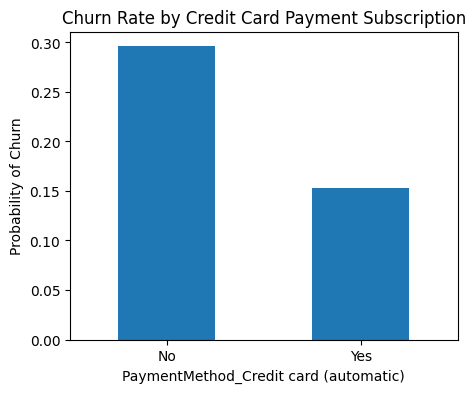

In [42]:
churn_rate = data.groupby('PaymentMethod_Credit card (automatic)')['Churn_Yes'].mean()
plt.figure(figsize=(5,4))
churn_rate.plot(kind='bar')
plt.title("Churn Rate by Credit Card Payment Subscription")
plt.ylabel("Probability of Churn")
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.show()

**Observation:** Automatic payment is associated with reduced churn, possibly due to ease and stronger service continuity.

*3.3. Multiple lines vs churn*

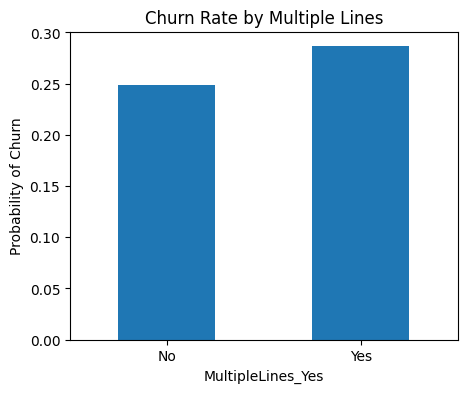

In [43]:
churn_rate = data.groupby('MultipleLines_Yes')['Churn_Yes'].mean()
plt.figure(figsize=(5,4))
churn_rate.plot(kind='bar')
plt.title("Churn Rate by Multiple Lines")
plt.ylabel("Probability of Churn")
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.show()

**Observation:** The association is present but modest, suggesting this variable is not a dominant driver.

**4.Training-Validation split from the data**

In [44]:
X = data.drop('Churn_Yes' , axis =1)
y= data['Churn_Yes']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42 , stratify = y)

**5. Logistic Regression used as baseline model for binary classification**

In [45]:
model = LogisticRegression(max_iter=5000, random_state=42, penalty='l1',
    solver='liblinear')
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_val)
print("LOGISTIC REGRESSION RESULTS")
print(f"Accuracy: {accuracy_score(y_val, y_pred_lr)*100:.2f}%")
print(f"Precision: {precision_score(y_val, y_pred_lr)*100:.2f}%")
print(f"Recall: {recall_score(y_val, y_pred_lr)*100:.2f}%")
print(f"F1 Score: {f1_score(y_val, y_pred_lr)*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_val, y_pred_lr))

LOGISTIC REGRESSION RESULTS
Accuracy: 80.81%
Precision: 67.11%
Recall: 53.91%
F1 Score: 59.79%

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.90      0.87      1031
        True       0.67      0.54      0.60       371

    accuracy                           0.81      1402
   macro avg       0.76      0.72      0.74      1402
weighted avg       0.80      0.81      0.80      1402



**6. Random Forest Classifier used as improved model for binary classification**

In [46]:
model2 = RandomForestClassifier(n_estimators=400,class_weight='balanced',random_state=42)
model2.fit(X_train, y_train)
y_pred_rf = model2.predict(X_val)
print("RANDOM FOREST RESULTS")
print(f"Accuracy: {accuracy_score(y_val, y_pred_rf)*100:.2f}%")
print(f"Precision: {precision_score(y_val, y_pred_rf)*100:.2f}%")
print(f"Recall: {recall_score(y_val, y_pred_rf)*100:.2f}%")
print(f"F1 Score: {f1_score(y_val, y_pred_rf)*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_val, y_pred_rf))

RANDOM FOREST RESULTS
Accuracy: 78.96%
Precision: 64.18%
Recall: 46.36%
F1 Score: 53.83%

Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.91      0.86      1031
        True       0.64      0.46      0.54       371

    accuracy                           0.79      1402
   macro avg       0.73      0.69      0.70      1402
weighted avg       0.78      0.79      0.78      1402



**7. Comparasion between baseline and improved model based upon accuracy, precision, recall, and F1 score**

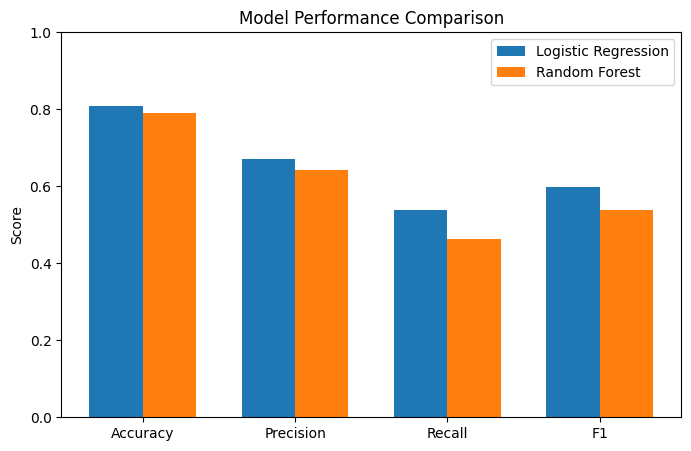

In [47]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

lr_scores = [
    accuracy_score(y_val, y_pred_lr),
    precision_score(y_val, y_pred_lr),
    recall_score(y_val, y_pred_lr),
    f1_score(y_val, y_pred_lr)
]

rf_scores = [
    accuracy_score(y_val, y_pred_rf),
    precision_score(y_val, y_pred_rf),
    recall_score(y_val, y_pred_rf),
    f1_score(y_val, y_pred_rf)
]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, lr_scores, width, label='Logistic Regression')
plt.bar(x + width/2, rf_scores, width, label='Random Forest')

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.ylim(0,1)
plt.show()

**8. Confusion Matrix for both the models**

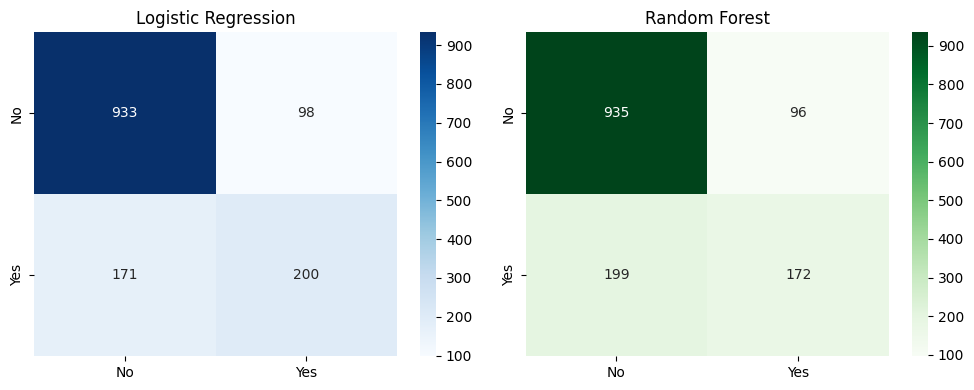

In [48]:
cm_lr = confusion_matrix(y_val, y_pred_lr)
cm_rf = confusion_matrix(y_val, y_pred_rf)

fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No","Yes"],
            yticklabels=["No","Yes"],
            ax=axes[0])
axes[0].set_title("Logistic Regression")

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=["No","Yes"],
            yticklabels=["No","Yes"],
            ax=axes[1])
axes[1].set_title("Random Forest")

plt.tight_layout()
plt.show()

**9. Conclusion**


We can conclude that Logistic Regression proves to be a better model for this particular use case comapared to Random Forest Classification
for this telco customer churn binary classification.